<a href="https://colab.research.google.com/github/kartik078svg/PREGRAD-PROJECT-/blob/main/Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/student_perf_10k.csv')


print(df.shape)

In [ ]:
print(df.columns)

Index(['gender', 'parental level of education', 'test preparation course',
       'math score', 'reading score', 'performance'],
      dtype='object')


In [ ]:
print(df.head())

   gender parental level of education test preparation course  math score  \
0  female           bachelor's degree                    none          75   
1  female                some college               completed          65   
2  female             master's degree                    none          92   
3    male          associate's degree                    none          47   
4    male                some college                    none          72   

   reading score performance  
0             71      medium  
1             85      medium  
2            100        high  
3             57         low  
4             82      medium  


In [ ]:
print(df.describe())

         math score  reading score
count  10000.000000    10000.00000
mean      66.063400       69.17890
std       15.444159       14.84311
min        0.000000       12.00000
25%       56.000000       59.00000
50%       66.000000       70.00000
75%       77.000000       80.00000
max      100.000000      100.00000


In [ ]:
print(df.isnull().sum())

gender                         0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
performance                    0
dtype: int64


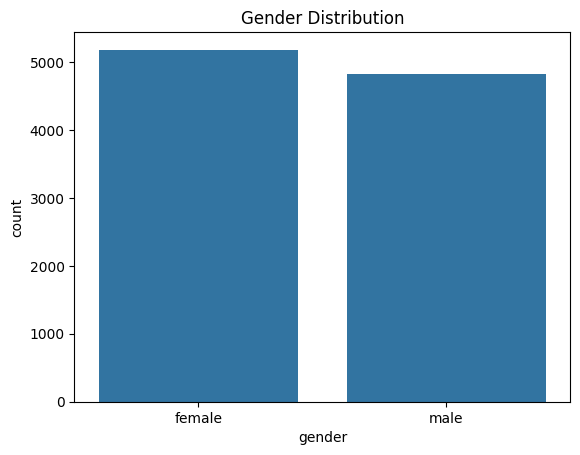

In [ ]:
# 4.1 Countplot of gender
sns.countplot(x='gender', data =df)
plt.title("Gender Distribution")
plt.show()

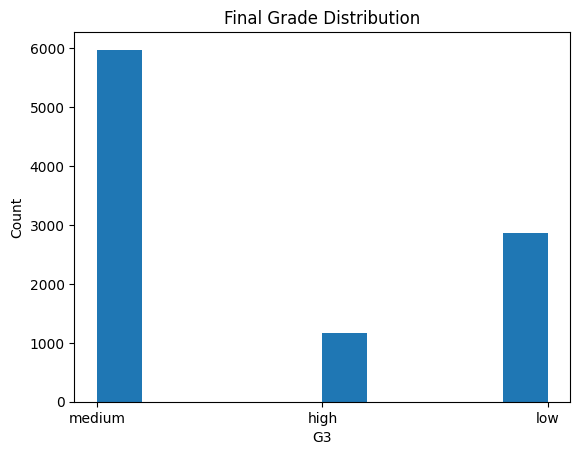

In [ ]:
# 2. Histogram of final grade
plt.hist(df['performance'], bins=10)
plt.title("Final Grade Distribution")
plt.xlabel("G3")
plt.ylabel("Count")
plt.show()


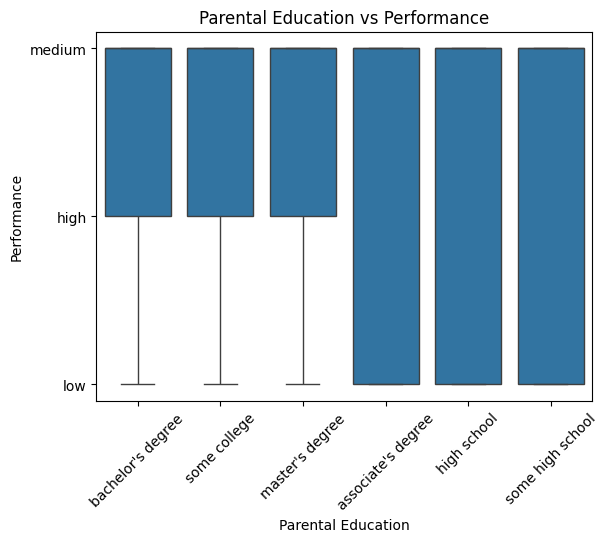

In [ ]:
# 3. Boxplot: study time vs G3
sns.boxplot(x='parental level of education', y='performance', data=df)
plt.title("Parental Education vs Performance")
plt.xlabel("Parental Education")
plt.ylabel("Performance")
plt.xticks(rotation=45)
plt.show()

<Axes: >

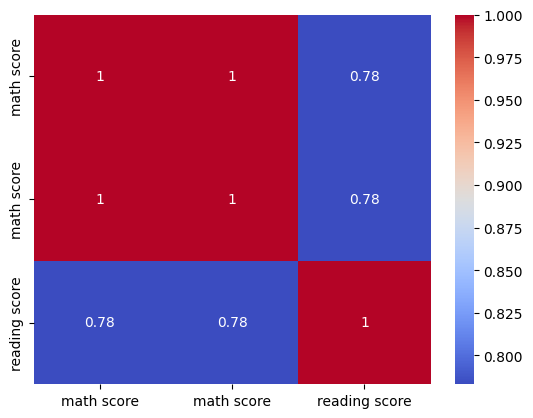

In [ ]:
# 4. Heatmap
sns.heatmap(df[['math score',
       'math score', 'reading score', ]].corr(), annot=True, cmap='coolwarm')


In [ ]:
# Step 5: Feature Scaling (Optional)
from sklearn.preprocessing import StandardScaler

X = df.drop('performance', axis=1)
y = df['performance']

# Identify categorical columns for one-hot encoding if needed
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Perform one-hot encoding on categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling completed successfully.")

Feature scaling completed successfully.


In [ ]:
# Step 7: Train ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svc = SVC()
knn = KNeighborsClassifier()

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Step 8: Evaluate Models
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate Decision Tree Classifier
y_pred_dt = dt.predict(X_test)
print("--- Decision Tree Classifier Evaluation ---")
print(classification_report(y_test, y_pred_dt))

# Evaluate Random Forest Classifier
y_pred_rf = rf.predict(X_test)
print("\n--- Random Forest Classifier Evaluation ---")
print(classification_report(y_test, y_pred_rf))

# Evaluate Support Vector Classifier
y_pred_svc = svc.predict(X_test)
print("\n--- Support Vector Classifier Evaluation ---")
print(classification_report(y_test, y_pred_svc))

# Evaluate K-Nearest Neighbors Classifier
y_pred_knn = knn.predict(X_test)
print("\n--- K-Nearest Neighbors Classifier Evaluation ---")
print(classification_report(y_test, y_pred_knn))

--- Decision Tree Classifier Evaluation ---
              precision    recall  f1-score   support

        high       0.99      1.00      1.00       238
         low       1.00      1.00      1.00       538
      medium       1.00      1.00      1.00      1224

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


--- Random Forest Classifier Evaluation ---
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       238
         low       0.99      1.00      0.99       538
      medium       1.00      0.99      0.99      1224

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000


--- Support Vector Classifier Evaluation ---
              precision    recall  f1-score   support

        high       0.98      0.97      0.98     

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Get classification reports as dictionaries
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_svc = classification_report(y_test, y_pred_svc, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Extract relevant metrics for the table (using weighted averages for simplicity)
performance_table = pd.DataFrame([
    ['Decision Tree', report_dt['accuracy'], report_dt['weighted avg']['precision'], report_dt['weighted avg']['recall'], report_dt['weighted avg']['f1-score']],
    ['Random Forest', report_rf['accuracy'], report_rf['weighted avg']['precision'], report_rf['weighted avg']['recall'], report_rf['weighted avg']['f1-score']],
    ['SVC', report_svc['accuracy'], report_svc['weighted avg']['precision'], report_svc['weighted avg']['recall'], report_svc['weighted avg']['f1-score']],
    ['KNN', report_knn['accuracy'], report_knn['weighted avg']['precision'], report_knn['weighted avg']['recall'], report_knn['weighted avg']['f1-score']]
], columns=['Model', 'Accuracy', 'Precision (weighted avg)', 'Recall (weighted avg)', 'F1-Score (weighted avg)'])

# Display the table
print("--- Model Performance Comparison ---")
display(performance_table)

--- Model Performance Comparison ---


,Model,Accuracy,Precision (weighted avg),Recall (weighted avg),F1-Score (weighted avg)
0,Decision Tree,0.9975,0.997509,0.9975,0.997501
1,Random Forest,0.9925,0.992522,0.9925,0.992503
2,SVC,0.9860,0.986002,0.9860,0.985994
3,KNN,0.9765,0.976627,0.9765,0.976532
